# DESCRIPTIVE ANALYSIS BY SEGMENT

## LIBS

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## DATA IMPORT

In [2]:
df = pd.read_csv('purchase_data.csv')
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [3]:
df.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## DATA SEGMENTATION

### IMPORT SEGMENTATION MODEL

In [12]:
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

### STANDARDIZATION

In [9]:
features = df[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

### PCA

In [13]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

### K-Means PCA

In [16]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [17]:
df_purchase_predictors = df.copy()

In [18]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## DESCRIPTIVE ANALYSIS BY SEGMENTS

### By Customer

In [21]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,3
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,3
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,3


In [28]:
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [29]:
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [30]:
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [31]:
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [32]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,3.0
200000002,87,11,0.126437,1.0
200000003,97,10,0.103093,3.0
200000004,85,11,0.129412,3.0
200000005,111,13,0.117117,2.0


### Segment Proportions

In [33]:
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0.0,0.206
1.0,0.198
2.0,0.234
3.0,0.362


Text(0.5, 1.0, 'Segment Proportions')

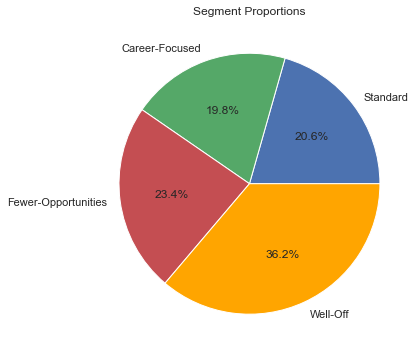

In [34]:
plt.figure(figsize = (9, 6))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.1f%%', 
        colors = ('b', 'g', 'r', 'orange'))
plt.title('Segment Proportions')